# Importación de librerías

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import re # Expresiones regulares
from sklearn import preprocessing # LabelEncoder

In [11]:
data = pd.read_table("../Dataset/labeledEligibilitySample10k.csv", header = None)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [12]:
print(data.shape)

(10000, 1)


### Se transforma la variable elegible (la salida) en 0 y 1

In [13]:
clin_trial = pd.DataFrame(np.array(data).reshape(10000,1), columns=['Description'])
clin_trial[:].head(10)

,Description
0,"18518,__label__0,study interventions are Erlot..."
1,"71331,__label__0,study interventions are Antib..."
2,"232342,__label__0,study interventions are Cycl..."
3,"450677,__label__0,study interventions are Pred..."
4,"410008,__label__0,study interventions are Inte..."
5,"307723,__label__0,study interventions are Erlo..."
6,"378773,__label__0,study interventions are Phar..."
7,"479580,__label__0,study interventions are Myco..."
8,"458795,__label__0,study interventions are gamm..."
9,"366518,__label__0,study interventions are Succ..."


In [14]:
clin_trial['Num'], clin_trial['ExtraPart'] = clin_trial['Description'].str.split(',', 1).str
clin_trial=clin_trial.drop(['Num'], axis=1)

clin_trial['Label'], clin_trial['TrashPart'] = clin_trial['ExtraPart'].str.split(',', 1).str
clin_trial['Eligible'] = clin_trial['Label'].str.extract('(\d)', expand=True)
clin_trial=clin_trial.drop(['Label'], axis=1)
clin_trial=clin_trial.drop(['ExtraPart'], axis=1)

clin_trial['Interventions'], clin_trial['Diagnoses'] = clin_trial['TrashPart'].str.split('.', 1).str
clin_trial=clin_trial.drop(['TrashPart'], axis=1)

clin_trial=clin_trial.drop(['Description'], axis=1)

clin_trial.head(10)

,Eligible,Interventions,Diagnoses
0,0,study interventions are Erlotinib Hydrochloride,recurrent midline lethal granuloma of the par...
1,0,study interventions are Antibodies,fallopian tube cancer diagnosis and periphera...
2,0,study interventions are Cyclosporine,recurrent adult diffuse mixed cell lymphoma d...
3,0,study interventions are Prednisolone phosphate,childhood immunoblastic large cell lymphoma d...
4,0,study interventions are Interferon-alpha,stage multiple myeloma diagnosis and serum pr...
5,0,study interventions are Erlotinib Hydrochloride,patients must have carcinoma of unknown prima...
6,0,study interventions are Pharmacological Study,hepatoblastoma diagnosis and two weeks must h...
7,0,study interventions are Mycophenolic Acid,recurrent grade one follicular lymphoma diagn...
8,0,study interventions are gamma-secretase/Notch ...,recurrent non small cell lung cancer diagnosi...
9,0,study interventions are Succinylcholine,untreated childhood medulloblastoma diagnosis...


In [15]:
# Se quita study interventions are puesto que está en todas las muestras de la varialbe Interventions
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace("study interventions are\s", "")
clin_trial.sample(10)

,Eligible,Interventions,Diagnoses
3547,0,Vorinostat,adult nasal type extranodal nk cell lymphoma ...
6316,1,Cobimetinib,malignant melanoma diagnosis and history of o...
7329,1,Everolimus,stage grade two follicular lymphoma diagnosis...
6448,1,Vincristine,atypical_teratoid rhabdoid tumor diagnosis an...
1239,0,Albumin-Bound Paclitaxel,undifferentiated ovarian carcinoma diagnosis ...
9756,1,Mycophenolate mofetil,stage adult diffuse large cell lymphoma diagn...
213,0,Internet-Based Intervention,malignant diagnosis in any cancer type at any...
3215,0,"""Calcium, Dietary",intestinal adenocarcinoma of the stomach diag...
7550,1,Cyclosporins,stage iii grade two follicular lymphoma diagn...
5439,1,Curcumin,breast carcinoma diagnosis and subject is cur...


In [16]:
#Sirve para buscar palabras con esos caracteres

# for name in list(clin_trial.columns):
#     for sample in clin_trial[name]:
#         if re.findall('[+=*^#áÁéÉíÍóÓúÚ\[\]\$,.;:!@¡¿?\{\}\&`~\^\(\)|%_\-<>\'\"]', sample):
#             print(sample, "\n") ## Funciona para detectar caracteres especiales

In [17]:
# Se transforma todo a minúsculas
clin_trial['Interventions'] = clin_trial['Interventions'].str.lower() ##Todo a minúscula
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.lower()     ##Todo a minúscula

#Se reemplazan vocales con tildes en ambas variables
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('["]', '', regex=True)

clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('^\s', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('["]', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[;]', '', regex=True)



#clin_trial.sample(10)

In [18]:
# Total de categorías diferentes en la variable Interventions
len(np.unique(clin_trial['Interventions'])) 

1426

In [19]:
# Sirve para ver cuantos datos hay por categoría de interventions

datosInt = clin_trial['Interventions'].value_counts()

In [20]:
# Total de categorías diferentes en la variable Diagnoses
len(np.unique(clin_trial['Diagnoses']))

9786

In [21]:
datosDiag = clin_trial['Diagnoses'].value_counts() 
#datosDiag

## Codificación de la variable Interventions

In [22]:
labels = np.unique(clin_trial['Interventions'])

lb_interventions = preprocessing.LabelEncoder()
lb_interventions.fit(labels)
clin_trial['Interventions'] = lb_interventions.transform(clin_trial['Interventions']) 

In [23]:
clin_trial

,Eligible,Interventions,Diagnoses
0,0,464,recurrent midline lethal granuloma of the para...
1,0,101,fallopian tube cancer diagnosis and peripheral...
2,0,349,recurrent adult diffuse mixed cell lymphoma di...
3,0,1052,childhood immunoblastic large cell lymphoma di...
4,0,708,stage multiple myeloma diagnosis and serum pro...
5,0,464,patients must have carcinoma of unknown primar...
6,0,998,hepatoblastoma diagnosis and two weeks must ha...
7,0,875,recurrent grade one follicular lymphoma diagno...
8,0,562,recurrent non small cell lung cancer diagnosis...
9,0,1241,untreated childhood medulloblastoma diagnosis ...


# Remover Stop Words

## Preliminares

In [24]:
# Se carga la libreria
from nltk.corpus import stopwords

# Se debe descargar el conjunto de 'Stop Words' la primera vez
import nltk
nltk.download('stopwords')

#Se carga la librería de lematización
#PONER conda install -c conda-forge spacy EN ANACONDA PROMPT
# Y python -m spacy download en_core_web_sm

#Se carga la librería de lematización
import spacy
nlp = spacy.load("en_core_web_sm")

#Se carga la librería de stemming y se inicializa el stemmer
import nltk
from nltk import SnowballStemmer
stemmer=SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Crear las palabras Token

## Lematización

"Dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos." -Wikipedia

In [25]:
#https://medium.com/qu4nt/reducir-el-número-de-palabras-de-un-texto-lematización-y-radicalización-stemming-con-python-965bfd0c69fa
toks = []

for sample in clin_trial['Diagnoses']:
    words = nlp(sample)
    lemma = [tok.lemma_.lower() for tok in words]
    #print(lemma)
    toks.append(lemma)
    

## Cargar las Stop Words

In [26]:
# Carga las Stop Words en inglés
stop_words = stopwords.words('english')

## Estaría bien revisar este conjunto 'english'. Pero supongo que es el más útil para nuestro caso también.
# Imprime algunas Stop Words
#stop_words[:100]

## Remover las Stop Words

In [27]:
tokens = []
for tok in toks:
    clean_word = [word for word in tok if word not in stop_words]
    tokens.append(clean_word)

## Stemming

"Es un método para reducir una palabra a su raíz o (en inglés) a un stem." - Wikipedia

In [28]:
stemms = []
for tok in tokens:
    var = [stemmer.stem(token) for token in tok]
    stemms.append(var)

# Bag of Words

In [29]:
def extract_words(sentence):
    words = []
    for i in sentence:
        if i not in words:
            words.append(i)
    return words

def getAll_words(data):
    words = []
    for i in data:
        wordsPerSentence = extract_words(i)
        for j in wordsPerSentence:
            if j not in words:
                words.append(j)
    return words

def wordFrequency(sentence, words):
    sentence_words = sentence
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

def bagOfWords(data, words):
    bow = []
    for i in data:
        freq = wordFrequency(i, words)
        bow.append(freq)
    return bow

In [30]:
words = getAll_words(stemms)
bow = bagOfWords(stemms, words)

In [31]:
bowArray = np.asarray(bow)
wordsArray = np.asarray(words)
df = pd.DataFrame(data=bowArray, columns= wordsArray)

In [32]:
del clin_trial['Diagnoses']
clin_trial_full = pd.concat([clin_trial, df], axis=1)
clin_trial_full

,Eligible,Interventions,recurr,midlin,lethal,granuloma,paranas,sinus,nasal,caviti,...,kaposiform_hemangioendothelioma,khe,damag,peroxid,color,bleach,streak,perm,relax,oxid
0,0,464,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
clin_trial_full.to_hdf('bagOfWords&interventios.h5', key = 'clin_trial')

In [44]:
stemms

[['recurr',
  'midlin',
  'lethal',
  'granuloma',
  'paranas',
  'sinus',
  'nasal',
  'caviti',
  'diagnosi',
  'protein',
  'less_than',
  'one',
  'twenti',
  '-',
  'four',
  'hour',
  'urin',
  'collect'],
 ['fallopian',
  'tube',
  'cancer',
  'diagnosi',
  'peripher',
  'vascular',
  'diseas',
  'greater_than',
  'ctcae',
  'grade',
  'two',
  'least',
  'brief',
  'less_than',
  'two4',
  'hrs',
  'episod',
  'ischemia',
  'manag',
  'non',
  'surgic',
  'without',
  'perman',
  'deficit'],
 ['recurr', 'adult', 'diffus', 'mix', 'cell', 'lymphoma', 'diagnosi', 'crtwo'],
 ['childhood',
  'immunoblast',
  'larg',
  'cell',
  'lymphoma',
  'diagnosi',
  'negat',
  'first',
  'remiss',
  'crone',
  'high',
  'risk',
  'featur',
  'includ',
  'know',
  'prior',
  'diagnosi',
  'myelodysplasia',
  'mds',
  'therapi',
  'relat',
  'aml',
  'white',
  'cell',
  'count',
  'present',
  'greater_than',
  'onezerozero',
  'zero',
  'presenc',
  'extramedullari',
  'leukemia',
  'diagnosi'

In [45]:
np.savetxt('stemms.txt', stemms, fmt = '%.3e + %.3ej')

ValueError: fmt has wrong number of % formats:  %.3e + %.3ej

In [34]:
bagOfWords = pd.read_hdf('bagOfWords&interventios.h5', 'clin_trial')

In [35]:
bagOfWords

,Eligible,Interventions,recurr,midlin,lethal,granuloma,paranas,sinus,nasal,caviti,...,kaposiform_hemangioendothelioma,khe,damag,peroxid,color,bleach,streak,perm,relax,oxid
0,0,464,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ordenar y eliminar palabras

In [4]:
import operator

bowDict = {}


for column in bagOfWords:
    if column == 'Eligible' or column == 'Interventions':
        continue
    bowDict[column] = bagOfWords[column].sum()

bowDict_sort = sorted(bowDict.items(), key=operator.itemgetter(1), reverse=True)

len(bowDict_sort)
# print(bowDict_sort)

5288

In [5]:
bowDict_sort2 = []
i = 0
for word in bowDict_sort:    
    if word[1]== 1.0: #Para eliminar con un umbral
        continue
    bowDict_sort2.append(bowDict_sort[i][0])
    i = i + 1
del bowDict_sort2[0]

In [6]:
print(len(bowDict_sort2), len(bowDict_sort))

3243 5288


# TF-IDF 
Term frequency – Inverse document frequency

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
bowDict_sort2

['cancer',
 'cell',
 'patient',
 'lymphoma',
 'stage',
 'prior',
 'one',
 'recurr',
 'carcinoma',
 'greater_than',
 'studi',
 'diseas',
 'therapi',
 'must',
 'breast',
 'two',
 'less_than',
 'adult',
 'within',
 'treatment',
 'three',
 'tumor',
 'non',
 'doc',
 'equal_than',
 'hundr',
 'iv',
 '-',
 'grade',
 'day',
 'lung',
 'histori',
 'week',
 'small',
 'month',
 'requir',
 'five',
 'neoplasm',
 'four',
 'receiv',
 'activ',
 'metastat',
 'iii',
 'use',
 'chemotherapi',
 'medic',
 'myeloma',
 'least',
 'system',
 'six',
 'investig',
 'ovarian',
 'malign',
 'infect',
 'hodgkin',
 'childhood',
 'multipl',
 '-pron-',
 'posit',
 'larg',
 'twenti',
 'includ',
 'follow',
 'prostat',
 'know',
 'limit',
 'ii',
 'normal',
 'squamous',
 'diffus',
 'adenocarcinoma',
 'particip',
 'dose',
 'clinic',
 'year',
 'zero',
 'woman',
 'agent',
 'may',
 'concurr',
 'follicular',
 'elig',
 'creatinin',
 'pregnant',
 'drug',
 'dl',
 'melanoma',
 'mg',
 'brain',
 'time',
 'consent',
 'hepat',
 'potenti',
 '

In [46]:
stemmsT = [ ' '.join(stemms[item]) for item in range (len(stemms))] #Se transforma de lista de listas a una lista

In [47]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stemmsT)

In [48]:
cols = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

In [49]:
df = pd.DataFrame(data=denselist, columns= cols)

In [50]:
df

,14v,1five,1four,1six,1three,1two,1two0,1two00,1two5,1zero,...,³one0,³one00,µl,ºc,½_teaspoon,μl,μmol,ⅰa,ⅱa,ⅲa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
aux = df
for word in df:
    if word not in bowDict_sort2:
        del aux[word]

In [65]:
aux.shape

(10000, 3223)

In [66]:
df = aux

# Concatenación de dfs

In [68]:
clin_trial_full = pd.concat([clin_trial, df], axis=1)
clin_trial_full

,Eligible,Interventions,1five,1four,1two,1two0,20oneon,2one,4two,7zero,...,zero,zeroa,zevalin,zoledron,zone,zubrod,µl,ºc,μl,μmol
0,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Guardado del modelo

In [69]:
clin_trial_full.to_hdf('bagOfWords10k_TFIDF-BoW.h5', key = 'clin_trial')

In [70]:
df_loaded = pd.read_hdf('bagOfWords10k_TFIDF-BoW.h5', 'clin_trial')

In [71]:
df_loaded

,Eligible,Interventions,1five,1four,1two,1two0,20oneon,2one,4two,7zero,...,zero,zeroa,zevalin,zoledron,zone,zubrod,µl,ºc,μl,μmol
0,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algoritmos de clasificación

In [72]:
clin_trial_values = clin_trial_full.values
Y = clin_trial_values[:, 0]
Y = Y.astype(int)
X = clin_trial_values[:, 1:]

In [73]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

In [74]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

# Naive Bayes

In [35]:
from sklearn.preprocessing import MinMaxScaler # Escala los datos
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt 
from string import ascii_uppercase 
# import seaborn as sns
import qgrid
import time
from sklearn.externals import joblib # Para guardar el modelo
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
from sklearn.naive_bayes import GaussianNB

In [39]:
def model_NB(impresion = False):

    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    nb = GaussianNB()
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        nb.fit(Xtrain, Ytrain)
        pred = nb.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_
                
        errores[j] = classification_error(pred, Ytest)
          
    if impresion == True:
        #Curva ROC
        auc = roc_auc_score(Ytest, pred)
        print('AUC: %.2f' % auc)
        fpr, tpr, thresholds = roc_curve(Ytest, pred)
        plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

AUC: 0.61


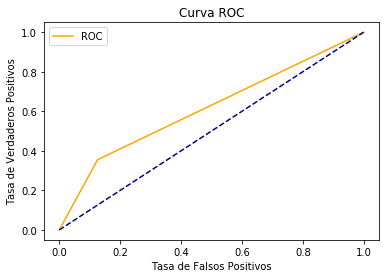

Eficiencia 0.6371  Int_Eficiencia 0.013375724279454913  Sensibilidad 0.63494643923183  Int_Sensibilidad 0.24029387552936812  Precision 0.6754230851099685  Int_Precision 0.0804371563682779  F-Score 0.6136358581369517  Int_F-Score 0.09723254023011359  Error_Prueba 0.3629  Int_Error 0.013375724279454928  Tiempo ejecución 99.80367612838745


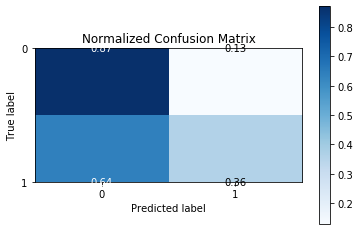

In [40]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_NB(impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [ ]:
# joblib.dump(nb, 'naive_bayes.pkl') # Guardo el modelo.

# Logistic Regression

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

In [42]:
def LRC(c, slv, impresion = False):

    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    LR = LogisticRegression(C=c, solver=slv, max_iter = 200)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        LR.fit(Xtrain, Ytrain)
        pred = LR.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

                
        errores[j] = classification_error(pred, Ytest)
           
    if impresion == True:
        #Curva ROC
        auc = roc_auc_score(Ytest, pred)
        print('AUC: %.2f' % auc)
        fpr, tpr, thresholds = roc_curve(Ytest, pred)
        plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

AUC: 0.80


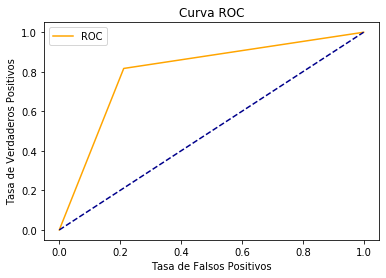

Eficiencia 0.8067000000000001  Int_Eficiencia 0.0027910571473905937  Sensibilidad 0.8068443652420261  Int_Sensibilidad 0.013715052951277961  Precision 0.8068707958848357  Int_Precision 0.0131894725924462  F-Score 0.8066536883148192  Int_F-Score 0.004065488670084745  Error_Prueba 0.1933  Int_Error 0.0027910571473905702  Tiempo ejecución 85.73696994781494


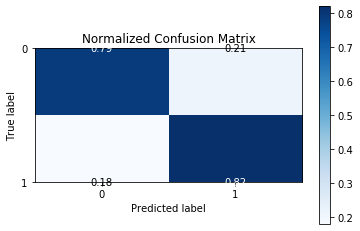

In [43]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(1, 'liblinear', impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [44]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Tipo de solver' : pd.Series(['newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 
                          'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 
                          'liblinear', 'liblinear', 'liblinear','liblinear','liblinear','liblinear',
                          'sag','sag','sag','sag','sag','sag',
                          'saga','saga','saga','saga','saga','saga']),
    'Valor de regularización' : pd.Series([0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Tipo de solver', 'Valor de regularización'], inplace=True)

i = 0
for k, n in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(n, k, impresion = False)
    df_types["Eficiencia"][i] = Acc
    df_types["Int_Eficiencia"][i] = IntAcc
    df_types["Sensibilidad"][i] = Sen
    df_types["Int_Sensibilidad"][i] = IntSen
    df_types["Precision"][i] = Pre
    df_types["Int_Precision"][i] = IntPre
    df_types["F-Score"][i] = f
    df_types["Int_F-Score"][i] = IntF
    df_types["Error_Prueba"][i] = error
    df_types["Int_error"][i] = stdError
    df_types["Tiempo de ejecución"][i] = tiempo
    
    i += 1
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [45]:
qgrid_widget.get_changed_df()

Eficiencia  \
Tipo de solver Valor de regularización                       
newton-cg      0.01                                 0.7656   
               0.10                                 0.7824   
               0.50                                 0.8015   
               1.00                                 0.8034   
               1.50                     0.8007000000000001   
               2.00                                 0.8021   
lbfgs          0.01                     0.7586999999999999   
               0.10                                 0.7879   
               0.50                                 0.7958   
               1.00                                 0.8042   
               1.50                                 0.7957   
               2.00                     0.7962999999999999   
liblinear      0.01                                 0.7617   
               0.10                     0.7909999999999999   
               0.50                                 0.8042   
               1.00                     0.7987000000000001   
               1.50                     0.8009000000000001   
               2.00                     0.8040999999999999   
sag            0.01                     0.7554000000000001   
               0.10                                 0.7886   
               0.50                                 0.7969   
               1.00                                 0.8085   
               1.50                     0.8009999999999999   
               2.00                     0.8009000000000001   
saga           0.01                                 0.7663   
               0.10                                 0.7919   
               0.50                                 0.7971   
               1.00                     0.7976000000000001   
               1.50                                 0.8021   
               2.00                                 0.7987   

                                               Int_Eficiencia  \
Tipo de solver Valor de regularización                          
newton-cg      0.01                      0.004445222154178571   
               0.10                      0.007042726744663578   
               0.50                      0.005631163290120444   
               1.00                      0.003944616584663169   
               1.50                      0.006009159675029471   
               2.00                      0.004457577817604542   
lbfgs          0.01                      0.007485318964479745   
               0.10                      0.008618004409374604   
               0.50                      0.006148170459575759   
               1.00                       0.00188679622641131   
               1.50                     0.0029983328701129876   
               2.00                       0.00602909611799316   
liblinear      0.01                      0.005847221562417473   
               0.10                      0.009097252332435326   
               0.50                       0.00599666574022599   
               1.00                       0.00442153819388684   
               1.50                      0.010116817681464848   
               2.00                      0.006808083430746167   
sag            0.01                     0.0042567593307585565   
               0.10                     0.0036276714294434043   
               0.50                      0.003011644069275124   
               1.00                     0.0059084684986889895   
               1.50                      0.004512205669071392   
               2.00                      0.003327160951922822   
saga           0.01                      0.006244197306299645   
               0.10                      0.004528796749689689   
               0.50                      0.004311612227461984   
               1.00                     0.0030594117081556714   
               1.50                      0.007213182376732181   
               2.00                      0.00401

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest

In [47]:
def model_RF(estimadores, caracteristicas, impresion = False):
        
    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    
    RF = RandomForestClassifier(n_estimators=estimadores, max_features =caracteristicas, n_jobs = -1)
    
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        RF.fit(Xtrain, Ytrain)
        pred = RF.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

        
        errores[j] = classification_error(pred, Ytest)
       
    
    if impresion == True:
        #Curva ROC
        auc = roc_auc_score(Ytest, pred)
        print('AUC: %.2f' % auc)
        fpr, tpr, thresholds = roc_curve(Ytest, pred)
        plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)
    

AUC: 0.81


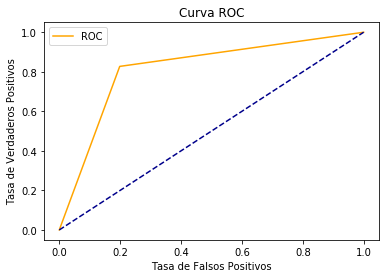

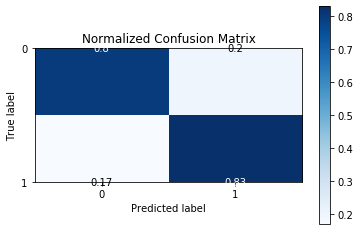

In [48]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(100, 50, impresion = True)

In [49]:
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

Eficiencia 0.8056  Int_Eficiencia 0.008740709353364864  Sensibilidad 0.8057266305162827  Int_Sensibilidad 0.030967804698351812  Precision 0.8066910559188663  Int_Precision 0.021454737628030088  F-Score 0.8054432736298711  Int_F-Score 0.010322100517828305  Error_Prueba 0.1944  Int_Error 0.008740709353364871  Tiempo ejecución 106.69102621078491


In [50]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,
                                     10,10,10,10,10,10,
                                     20,20,20,20,20,20,
                                     50,50,50,50,50,50,
                                     100,100,100,100,100,100]), 
    'Variables analizadas por nodo' : pd.Series([50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(n, k, impresion = False)
    df_types["Eficiencia"][n,k] = Acc
    df_types["Int_Eficiencia"][n,k] = IntAcc
    df_types["Sensibilidad"][n,k] = Sen
    df_types["Int_Sensibilidad"][n,k] = IntSen
    df_types["Precision"][n,k] = Pre
    df_types["Int_Precision"][n,k] = IntPre
    df_types["F-Score"][n,k] = f
    df_types["Int_F-Score"][n,k] = IntF
    df_types["Error_Prueba"][n,k] = error
    df_types["Int_error"][n,k] = stdError
    df_types["Tiempo de ejecución"][n,k] = tiempo


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [51]:
qgrid_widget.get_changed_df()

Eficiencia  \
Numero de arboles Variables analizadas por nodo                       
5                 50                             0.7434000000000001   
                  100                            0.7554000000000001   
                  250                            0.7567999999999999   
                  500                                        0.7593   
                  750                            0.7573000000000001   
                  1000                                        0.755   
10                50                             0.7707999999999999   
                  100                                        0.7685   
                  250                            0.7736999999999999   
                  500                            0.7670000000000001   
                  750                            0.7707999999999999   
                  1000                           0.7835000000000001   
20                50                                         0.7923   
                  100                                        0.7924   
                  250                                        0.7843   
                  500                            0.7918000000000001   
                  750                                        0.7942   
                  1000                                       0.7855   
50                50                                         0.8012   
                  100                                        0.7986   
                  250                                        0.7933   
                  500                                        0.8059   
                  750                            0.7958000000000001   
                  1000                                       0.7911   
100               50                                         0.8063   
                  100                                         0.802   
                  250                                        0.7959   
                  500                            0.7971999999999999   
                  750                                        0.7909   
                  1000                           0.7966000000000001   

                                                        Int_Eficiencia  \
Numero de arboles Variables analizadas por nodo                          
5                 50                               0.00812157620169879   
                  100                            0.0012806248474865718   
                  250                             0.008795453370918405   
                  500                             0.002027313493271341   
                  750                             0.010148398888494694   
                  1000                            0.005095095681142786   
10                50                              0.004498888751680787   
                  100                             0.005187484939737166   
                  250                             0.006276145313805282   
                  500                             0.010622617379911603   
                  750                            0.0022090722034374503   
                  1000                            0.008613361713059516   
20                50                              0.009651424765287282   
                  100                             0.007282856582413241   
                  250                            0.0048363209157374805   
                  500                            0.0062769419305900905   
                  750                             0.004669047011971532   
                  1000                           0.0077272245987806045   
50                50                                0.0057131427428343   
                  100                             0.005347896782848354   
                  250                             0.006048966853934621   
                  500                             0.007830070242341365   
        